In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
df = pd.read_csv("student_performance_100_students.csv")

df.head(100)

,Student_ID,Gender,Study_Hours,Attendance,Previous_Score,Parental_Education,Internet_Access,Extracurricular,Final_Score,Result
0,1,Male,7,76,73,PostGraduate,No,No,82,Pass
1,2,Female,2,83,45,PostGraduate,No,No,47,Fail
2,3,Male,2,93,61,Graduate,No,No,56,Pass
3,4,Male,4,96,50,PostGraduate,No,No,58,Pass
4,5,Male,2,76,87,Graduate,Yes,Yes,71,Pass
...,...,...,...,...,...,...,...,...,...,...
95,96,Female,2,61,46,HighSchool,No,Yes,48,Fail
96,97,Female,2,82,42,Graduate,No,No,51,Pass
97,98,Female,4,68,56,PostGraduate,No,No,60,Pass
98,99,Female,5,49,72,Graduate,Yes,Yes,63,Pass


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_ID          100 non-null    int64 
 1   Gender              100 non-null    object
 2   Study_Hours         100 non-null    int64 
 3   Attendance          100 non-null    int64 
 4   Previous_Score      100 non-null    int64 
 5   Parental_Education  100 non-null    object
 6   Internet_Access     100 non-null    object
 7   Extracurricular     100 non-null    object
 8   Final_Score         100 non-null    int64 
 9   Result              100 non-null    object
dtypes: int64(5), object(5)
memory usage: 7.9+ KB


In [6]:
print(df.isnull().sum())

# Fill numeric missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

Student_ID            0
Gender                0
Study_Hours           0
Attendance            0
Previous_Score        0
Parental_Education    0
Internet_Access       0
Extracurricular       0
Final_Score           0
Result                0
dtype: int64


In [7]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head(100)

,Student_ID,Gender,Study_Hours,Attendance,Previous_Score,Parental_Education,Internet_Access,Extracurricular,Final_Score,Result
0,1,1,7,76,73,2,0,0,82,1
1,2,0,2,83,45,2,0,0,47,0
2,3,1,2,93,61,0,0,0,56,1
3,4,1,4,96,50,2,0,0,58,1
4,5,1,2,76,87,0,1,1,71,1
...,...,...,...,...,...,...,...,...,...,...
95,96,0,2,61,46,1,0,1,48,0
96,97,0,2,82,42,0,0,0,51,1
97,98,0,4,68,56,2,0,0,60,1
98,99,0,5,49,72,0,1,1,63,1


In [8]:
# Remove extra spaces
df.columns = df.columns.str.strip()

# Define features and target
X = df.drop("Result", axis=1)
y = df["Result"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100, 9)
y shape: (100,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 1  0]
 [ 0 19]]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        19

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [15]:
importance = model.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

print(feature_importance)

              Feature  Importance
8         Final_Score    1.071822
2         Study_Hours    0.368170
1              Gender    0.190061
3          Attendance    0.164102
6     Internet_Access    0.071419
4      Previous_Score    0.031435
0          Student_ID    0.023505
7     Extracurricular   -0.097600
5  Parental_Education   -0.204510


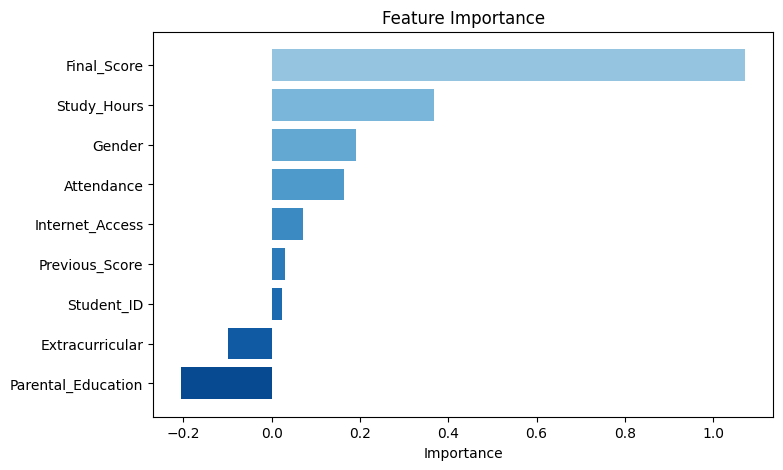

In [16]:
plt.figure(figsize=(8,5))

colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(feature_importance)))

plt.barh(feature_importance["Feature"],
         feature_importance["Importance"],
         color=colors)

plt.xlabel("Importance")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show()